In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [6]:
X_train,y_train,X_test,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
X_train.shape

(712, 3)

In [8]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [9]:
mean_Age=X_train['Age'].mean()
median_Age=X_train['Age'].median()
mean_Fare=X_train['Fare'].mean()
median_Fare=X_train['Fare'].median()

In [10]:
X_train['median_Age']=X_train['Age'].fillna(median_Age)
X_train['mean_Age']=X_train['Age'].fillna(mean_Age)
X_train['median_Fare']=X_train['Fare'].fillna(median_Fare)
X_train['mean_Fare']=X_train['Fare'].fillna(mean_Fare)

In [11]:
X_train.sample(10)

,Age,Fare,Family,median_Age,mean_Age,median_Fare,mean_Fare
625,61.0,32.3208,0,61.0,61.0,32.3208,32.3208
348,3.0,15.9000,2,3.0,3.0,15.9000,15.9000
883,28.0,10.5000,0,28.0,28.0,10.5000,10.5000
243,22.0,7.1250,0,22.0,22.0,7.1250,7.1250
114,17.0,14.4583,0,17.0,17.0,14.4583,14.4583
53,29.0,26.0000,1,29.0,29.0,26.0000,26.0000
467,56.0,26.5500,0,56.0,56.0,26.5500,26.5500
483,63.0,9.5875,0,63.0,63.0,9.5875,9.5875
817,31.0,37.0042,2,31.0,31.0,37.0042,37.0042
49,18.0,17.8000,1,18.0,18.0,17.8000,17.8000


In [12]:
#Check for the variance
print('Original Variance is', X_train['Age'].var())
print('Variance after median imputation is', X_train['median_Age'].var())
print('Variance after mean imputation is', X_train['mean_Age'].var())
print('Original Variance is', X_train['Fare'].var())
print('Variance after median imputation is', X_train['median_Fare'].var())
print('Variance after mean imputation is', X_train['mean_Fare'].var())

Original Variance is 204.3495133904614
Variance after median imputation is 161.98956633460543
Variance after mean imputation is 161.81262452718673
Original Variance is 2448.197913706318
Variance after median imputation is 2340.0910219753637
Variance after mean imputation is 2324.2385256705547


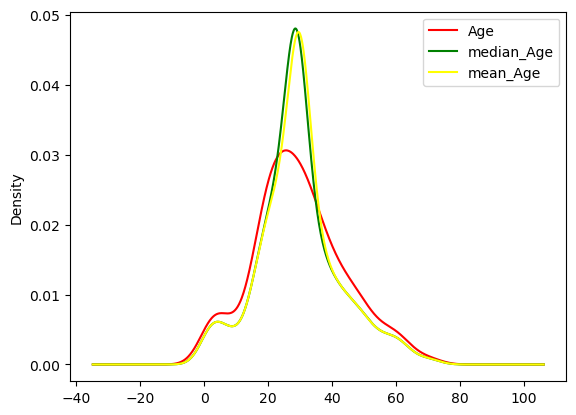

In [13]:
ax=plt.subplot(111)
X_train['Age'].plot.density(ax=ax,color='red')
X_train['median_Age'].plot.density(ax=ax,color='green')
X_train['mean_Age'].plot.density(ax=ax,color='yellow')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

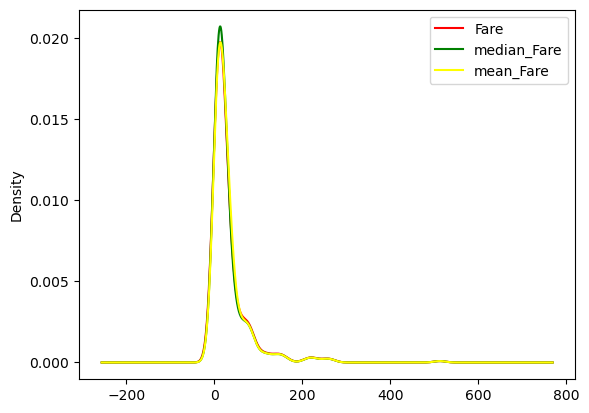

In [14]:
ax=plt.subplot(111)
X_train['Fare'].plot.density(ax=ax,color='red')
X_train['median_Fare'].plot.density(ax=ax,color='green')
X_train['mean_Fare'].plot.density(ax=ax,color='yellow')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [15]:
X_train.cov()

,Age,Fare,Family,median_Age,mean_Age,median_Fare,mean_Fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
median_Age,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
mean_Age,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
median_Fare,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
mean_Fare,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


<Axes: >

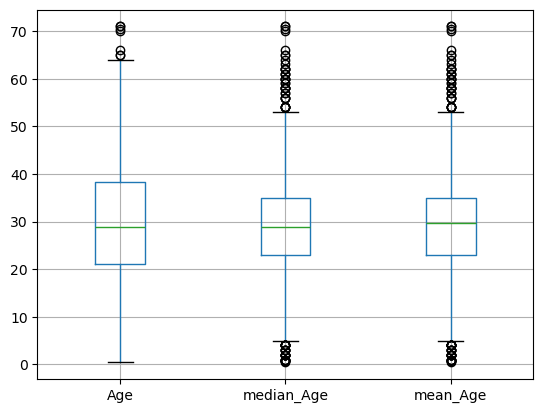

In [16]:
X_train[['Age','median_Age','mean_Age']].boxplot()

<Axes: >

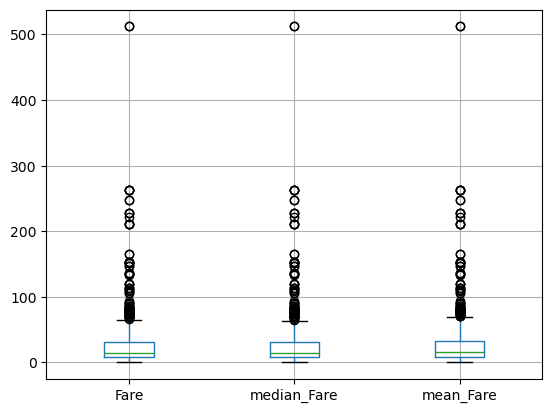

In [17]:
X_train[['Fare','median_Fare','mean_Fare']].boxplot()

**USING SKLEARN**

In [18]:
X_train,y_train,X_test,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [20]:
trf=ColumnTransformer(
    [
       ('imputer1',imputer1,['Age']),
        ('imputer2',imputer2,['Fare'])
        
    ],remainder='passthrough'
)

In [21]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [22]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [23]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])